<a href="https://colab.research.google.com/github/MitrabhanuPanda/MACHINE-LEARNING-PROJECT/blob/main/MITRABHANU_PANDA_1D_Default_of_Credit_Card_Client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

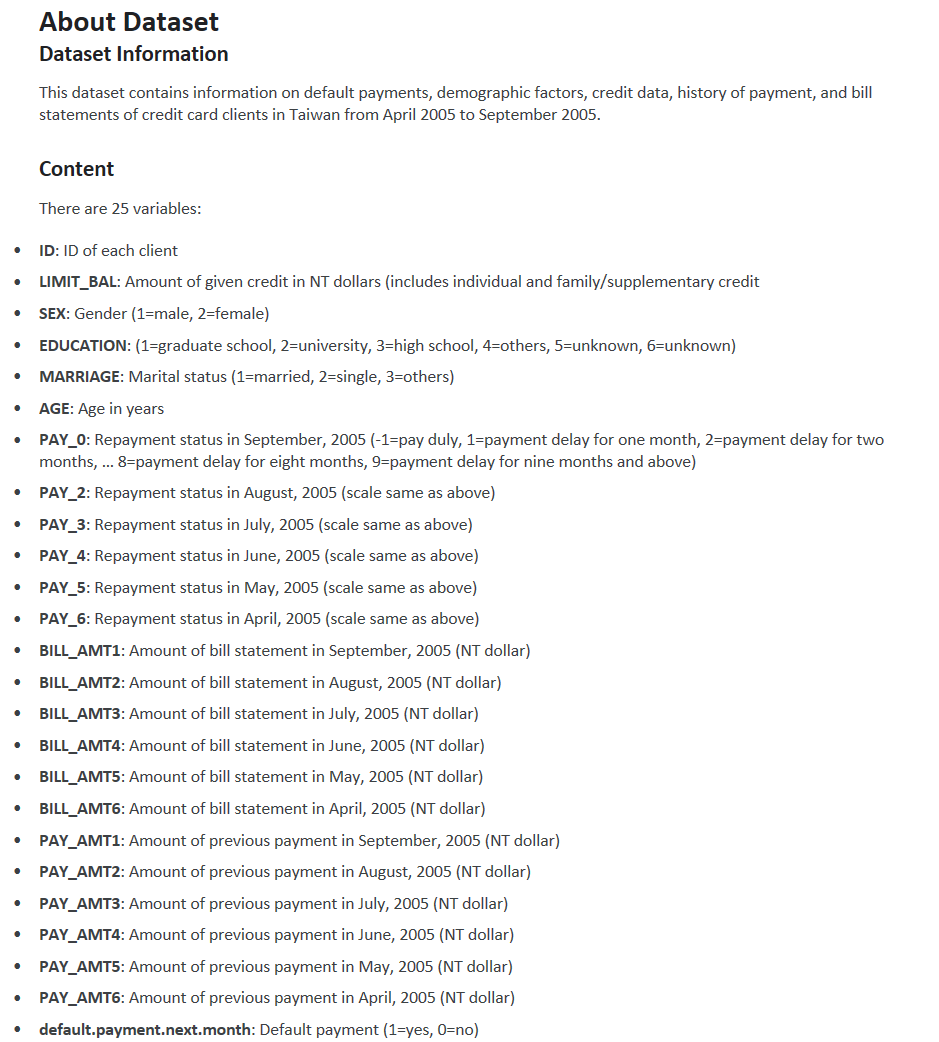

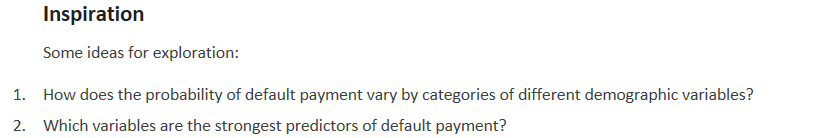

# **PROJECT OBJECTIVE**
- To Predict the DEFAULT PAYMENT by using Strongest Predictors which influence the Chance of Credit Card Default.


### **IMPORTING ALL REQUIRED LIBRARY**

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### **EXTRACTING THE DATASET**

In [273]:
# It will store the dataset
df=pd.read_csv("https://raw.githubusercontent.com/MitrabhanuPanda/MACHINE-LEARNING-PROJECT/main/1.%20DEFAULT%20OF%20CREDIT%20CARD%20CLIENTS/UCI_Credit_Card.csv")

In [274]:
# It will give only top 5 records
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [275]:
# It will show the Rows & Columns
df.shape

(30000, 25)

In [276]:
# It will give all the Column Name, their Non_Null Values, No. of Records, Data types of all the Variable/Features, How many space the dataset take.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [277]:
# It will give all the Features name that are present in the dataset.
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [278]:
# It will give how many null/missing values present inside the columns.
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# **CATEGORICAL FEATURE DATA VALIDATION & DATA CLEANING**

**default.payment.next.month** ---> **Target Feature**

In [279]:
# It is a Target Variable.
# Target variable is a variable by using we can predict the ne data points outcome.
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [280]:
# The Feature default.payment.next.month name is very big so i convert it to,def_pay
df.rename(columns={'default.payment.next.month':'DEF_PAY'},inplace=True)

**SEX FEATURE**
- It have Two Values 1 & 0.
- 1=Male
- 2=Female

- It is Discrete Numeric Variable.
- **Discrete Variable is a variable which value we can count.**

In [281]:
# It is a Predictor Variable.
# Predictor Variable is a variable which is used for Prediction.
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [282]:
pd.crosstab(df['SEX'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763


<Axes: xlabel='count', ylabel='SEX'>

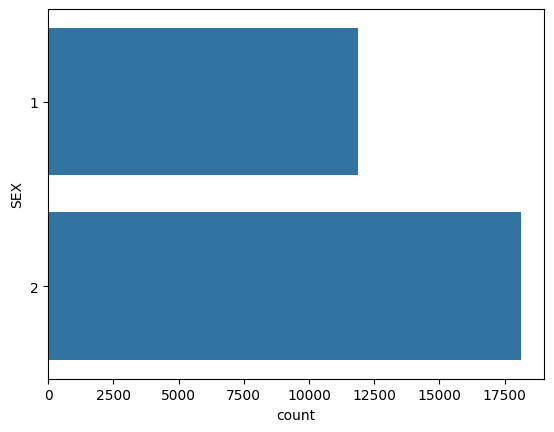

In [283]:
sns.countplot(y='SEX',data=df)

**EDUCATION**
- It have 6 Values 1,2,3,4,5,6.
- 1=Graduate School
- 2=University
- 3=High School
- 4=Others
- 5=Unkown
- 6=Unkown

- It is a Discrete Numeric Variable.


In [284]:
# It is Predictor Feature.
df['EDUCATION'].value_counts(normalize=True)

EDUCATION
2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='EDUCATION'>

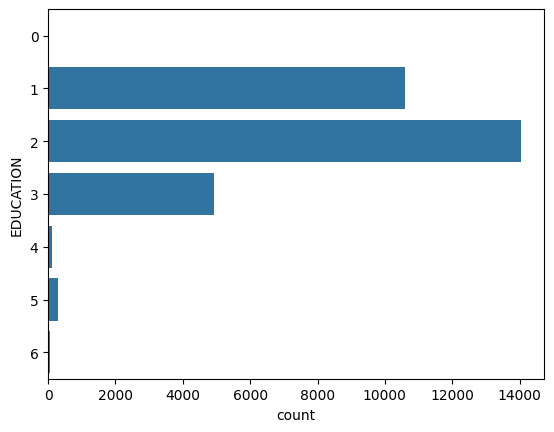

In [285]:
sns.countplot(y='EDUCATION',data=df)

In [286]:
pd.crosstab(df['EDUCATION'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
EDUCATION,,
0,1.000000,0.000000
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.943089,0.056911
5,0.935714,0.064286
6,0.843137,0.156863


In [287]:
# The 5,6 variable are Unkown, so that I impute this to 4 that is Other.
# I have done this because in other category all the Unkown can also come.

df['EDUCATION'][(df['EDUCATION']==5)|(df['EDUCATION']==6)|(df['EDUCATION']==0)]=4

<ipython-input-287-bc47e638c0aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'][(df['EDUCATION']==5)|(df['EDUCATION']==6)|(df['EDUCATION']==0)]=4


**MARRIAGE**
- It have 3 values 1,2,3.
- 1=Married
- 2=Single
- 0=Others

- It is a Discrete Numeric Variable.

In [288]:
# It is Predictor Feature.
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [289]:
# We do not know about the value 4,0. so that I impute this to value 3.
df['MARRIAGE'][(df['MARRIAGE']==4) | (df['MARRIAGE']==0)]=3

<ipython-input-289-9eb6f9bd6d4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MARRIAGE'][(df['MARRIAGE']==4) | (df['MARRIAGE']==0)]=3


In [290]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MARRIAGE'>

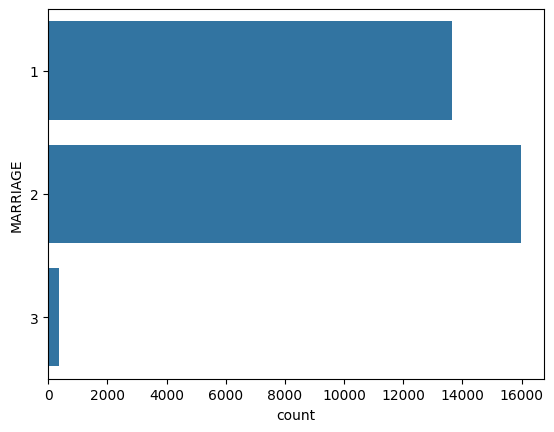

In [291]:
sns.countplot(y='MARRIAGE',data=df)

**AGE**
- According to Bussines Context, The age should be in between 18-60.

- In our dataset, It is a Discrete Numeric Variable.

In [292]:
# It is Predictor Feature.
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
57     122
58     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
71       3
72       3
79       1
74       1
Name: count, dtype: int64

In [293]:
pd.crosstab(df['AGE'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


In [294]:
df['AGE'][(df['AGE']>60) | (df['AGE']<18)]=df['AGE'].median()

<ipython-input-294-4addfaf702c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'][(df['AGE']>60) | (df['AGE']<18)]=df['AGE'].median()


<Axes: xlabel='count', ylabel='AGE'>

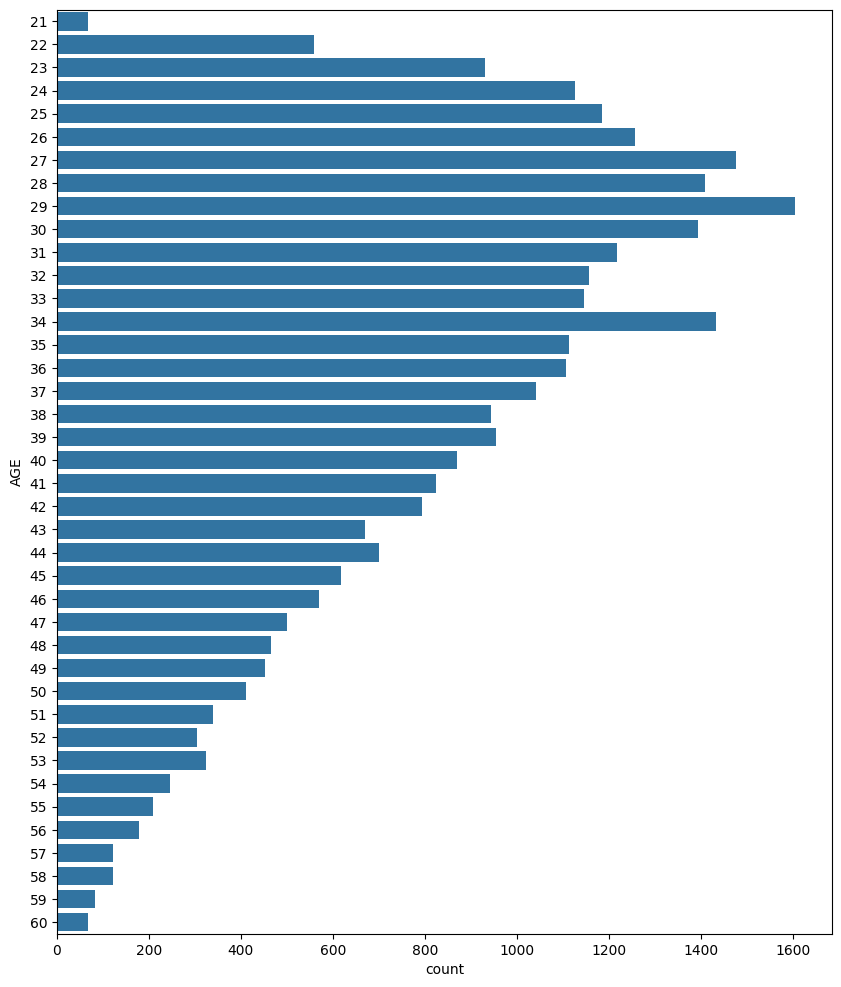

In [295]:
plt.figure(figsize=(10,12))
sns.countplot(y='AGE',data=df)

**PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6**
- Repayment Status in September, 2005
- It have 10 Values.
- -1=Pay Duly (It means we pay the money before the date in due months)
- 1=Payment delay for one month
- 2=Payment delay for two months
- 3=Payment delay for three months
- 4=Payment delay for four months
- 5=Payment delay for five months
- 6=Payment delay for six months
- 7=Payment delay for seven months
- 8=Payment delay for eight months
- 9=Payment delay for nin months & above



- This Features are Discrete Numeric Variable.
- This Features are also Predictor Feature.

In [296]:
# It is Predictor Feature.
df['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [297]:
pd.crosstab(df['PAY_0'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
PAY_0,,
-2,0.867706,0.132294
-1,0.832219,0.167781
0,0.871887,0.128113
1,0.660521,0.339479
2,0.308586,0.691414
3,0.242236,0.757764
4,0.315789,0.684211
5,0.500000,0.500000
6,0.454545,0.545455


In [298]:
# -1,-2 is nothing but the payment in time/before time. so i impute it to 0 that is nothing but payment on duly.
df['PAY_0'][(df['PAY_0']==-1) | (df['PAY_0']==-2)]=0

<ipython-input-298-e2f65f9db6bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_0'][(df['PAY_0']==-1) | (df['PAY_0']==-2)]=0


In [299]:
# There is no Pay_1 Feature is there,so i convert the Pay_0 to Pay_1.
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [300]:
pd.crosstab(df['PAY_2'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
PAY_2,,
-2,0.817292,0.182708
-1,0.840331,0.159669
0,0.840877,0.159123
1,0.821429,0.178571
2,0.443850,0.556150
3,0.383436,0.616564
4,0.494949,0.505051
5,0.400000,0.600000
6,0.250000,0.750000


In [301]:
pd.crosstab(df['PAY_3'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
PAY_3,,
-2,0.814688,0.185312
-1,0.844055,0.155945
0,0.825488,0.174512
1,0.750000,0.250000
2,0.484420,0.515580
3,0.425000,0.575000
4,0.421053,0.578947
5,0.428571,0.571429
6,0.391304,0.608696


In [302]:
pd.crosstab(df['PAY_4'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
PAY_4,,
-2,0.807498,0.192502
-1,0.841041,0.158959
0,0.816712,0.183288
1,0.500000,0.500000
2,0.476733,0.523267
3,0.388889,0.611111
4,0.333333,0.666667
5,0.485714,0.514286
6,0.600000,0.400000


In [303]:
pd.crosstab(df['PAY_5'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
PAY_5,,
-2,0.803124,0.196876
-1,0.838057,0.161943
0,0.811471,0.188529
2,0.458111,0.541889
3,0.365169,0.634831
4,0.392857,0.607143
5,0.411765,0.588235
6,0.250000,0.750000
7,0.172414,0.827586


In [304]:
pd.crosstab(df['PAY_6'],df['DEF_PAY']).apply(lambda x:x/x.sum(),axis=1)

DEF_PAY,0,1
PAY_6,,
-2,0.799591,0.200409
-1,0.830139,0.169861
0,0.811556,0.188444
2,0.493492,0.506508
3,0.358696,0.641304
4,0.367347,0.632653
5,0.461538,0.538462
6,0.263158,0.736842
7,0.173913,0.826087


In [305]:
# The Feature PAY_2,PAY_3,PAY_4,PAY_5,PAY_6, These Feature are similar to the Feature Pay_0.
# So I impute the -2,-1 value to 0 value.
# Beacuse this -2,-1 & 0 is telling us they are Pay Duly
df['PAY_2'][(df['PAY_2']==-1) | (df['PAY_2']==-2)]=0
df['PAY_3'][(df['PAY_3']==-1) | (df['PAY_3']==-2)]=0
df['PAY_4'][(df['PAY_4']==-1) | (df['PAY_4']==-2)]=0
df['PAY_5'][(df['PAY_5']==-1) | (df['PAY_5']==-2)]=0
df['PAY_6'][(df['PAY_6']==-1) | (df['PAY_6']==-2)]=0

<ipython-input-305-2a3fb35ddeed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_2'][(df['PAY_2']==-1) | (df['PAY_2']==-2)]=0
<ipython-input-305-2a3fb35ddeed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_3'][(df['PAY_3']==-1) | (df['PAY_3']==-2)]=0
<ipython-input-305-2a3fb35ddeed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_4'][(df['PAY_4']==-1) | (df['PAY_4']==-2)]=0
<ipython-input-305-2a3fb35ddeed>:7

## **CONTINUOUS FEATURE DATA EXPLORATION & DATA CLEANING**

**LIMIT_BAL FEATURE**
- Amount of given credit in NT dollars (includes individual and family/supplementary credit).


- It is Continuous Feature.

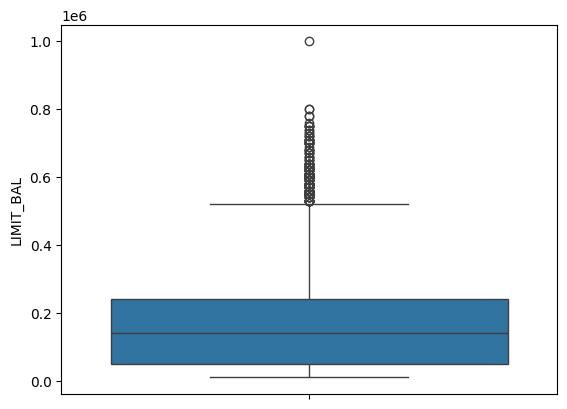

In [306]:
# It is Predictor Feature.
# It will give the Box Plot,which is used to see the Feature having outliers or not.
sns.boxplot(df['LIMIT_BAL'])
plt.show()

In [307]:
# It will give all the Percentile values.
# It will use for Outlier Detection.

df['LIMIT_BAL'].quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# We saw that 90% values are Cleaned  and 10% values are not cleaned.
# Because,the Values between 90% and 100% varries Drastically,it tell that their is some outliers present.

0.0      10000.0
0.1      30000.0
0.2      50000.0
0.3      70000.0
0.4     100000.0
0.5     140000.0
0.6     180000.0
0.7     210000.0
0.8     270000.0
0.9     360000.0
1.0    1000000.0
Name: LIMIT_BAL, dtype: float64

In [308]:
# For clear clarification,I will further segregate the Percentiles.

df['LIMIT_BAL'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

# We saw that 99% value are cleaned, 1% value are uncleaned.
# Because,the Values between 99% and 100% varries Drastically,it tell that their is some outliers present.

0.91     360000.0
0.92     380000.0
0.93     390000.0
0.94     410000.0
0.95     430000.0
0.96     460000.0
0.97     500000.0
0.98     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

In [309]:
df[df['LIMIT_BAL']>500000]=df['LIMIT_BAL'].median()

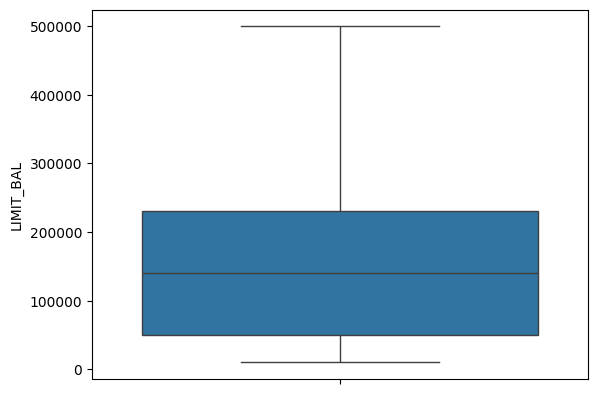

In [310]:
sns.boxplot(df['LIMIT_BAL'])
plt.show()

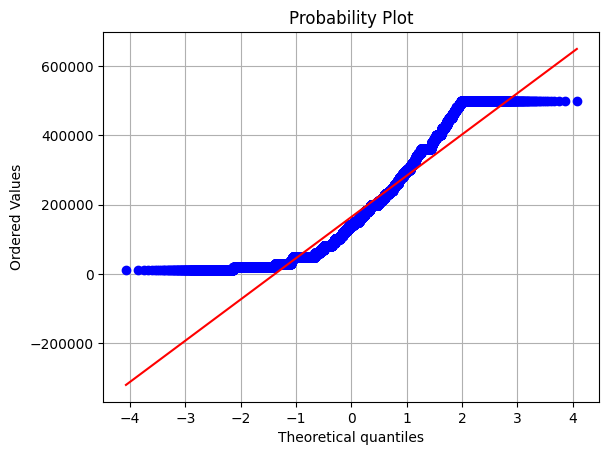

In [311]:
# It will show QQ-Plot.
stats.probplot(df['LIMIT_BAL'],dist='norm',plot=plt)
plt.grid()

# We saw that Limit_bal Feature is not Normally Distributed.

In [312]:
# It will give skew value of data.
df['LIMIT_BAL'].skew()
# This Feature is highly Positively skewed.

0.8846005684963786

**BILL_AMT1**
- Amount of bill statement in September, 2005 (NT dollar).

- It is Continuous Numeric Variable.
- It is a Prediactor.

<Axes: ylabel='BILL_AMT1'>

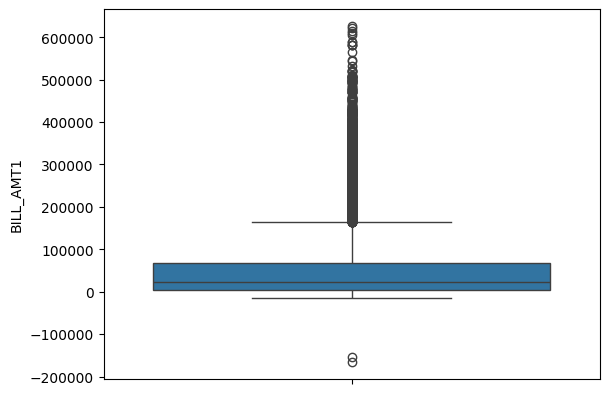

In [313]:
sns.boxplot(df['BILL_AMT1'])

In [314]:
# Negative Value Means,the customer give greater than the due payment.
# eg:--> Due Payment is 3000 but Customer give 3500,then the remain rest amount is 500,it shows in -500.

df['BILL_AMT1'].quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# There is drastically change in both Negative value and also in 1% value. That Means there is some outliers present inside it.

0.0   -165580.0
0.1       282.9
0.2      1905.8
0.3      6107.7
0.4     13686.6
0.5     22667.0
0.6     37606.8
0.7     53026.6
0.8     85109.2
0.9    140012.2
1.0    626648.0
Name: BILL_AMT1, dtype: float64

In [315]:
df['BILL_AMT1'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91    148968.90
0.92    158959.04
0.93    170953.77
0.94    183997.36
0.95    197743.15
0.96    215930.04
0.97    239718.27
0.98    276194.94
0.99    334429.01
1.00    626648.00
Name: BILL_AMT1, dtype: float64

In [316]:
df['BILL_AMT1'][df['BILL_AMT1']>350110.68]=df['BILL_AMT1'].median()

<ipython-input-316-d2a84dd0675f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT1'][df['BILL_AMT1']>350110.68]=df['BILL_AMT1'].median()


In [317]:
# For Negative Values, I impute Negative Median Value.
df['BILL_AMT1'][df['BILL_AMT1']<0]=df['BILL_AMT1'][df['BILL_AMT1']<0].median()

<ipython-input-317-587c28067b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT1'][df['BILL_AMT1']<0]=df['BILL_AMT1'][df['BILL_AMT1']<0].median()


<Axes: ylabel='BILL_AMT1'>

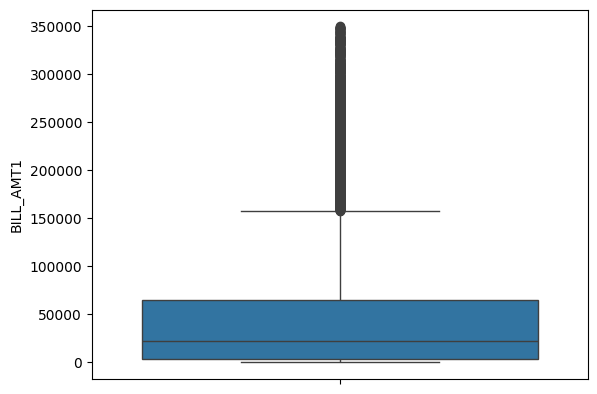

In [318]:
sns.boxplot(df['BILL_AMT1'])

**BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6**

In [319]:
# This Features having same problems like BILL_AMT1.
df[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0
0.1,0.0,0.0,0.0,0.0,0.0
0.2,1473.0,1200.0,992.0,773.6,481.8
0.3,5584.4,5290.7,4705.8,3700.0,2732.7
0.4,12982.8,12420.0,11323.0,9942.6,8900.6
0.5,21542.0,20266.5,19163.0,18249.5,17231.5
0.6,35333.8,31830.2,28812.0,26993.0,25793.4
0.7,50987.5,49492.3,45956.4,41526.6,39860.6
0.8,81576.8,78033.8,71830.2,67088.8,64772.4
0.9,140000.0,134889.1,126060.3,119052.8,116250.7


In [320]:
df[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.91,142709.44,140000.00,134142.17,127508.89,124109.54
0.92,152633.76,146044.60,140000.00,136133.24,132864.48
0.93,164832.05,156904.86,145508.15,140000.00,140000.00
0.94,177557.86,170201.48,157342.82,147857.66,145458.06
0.95,191256.55,184029.55,171022.50,162448.05,157967.40
0.96,206707.12,199437.24,187835.04,177425.08,173764.60
0.97,231408.08,222290.14,204093.69,195069.12,191154.58
0.98,264268.34,255849.36,239808.92,222464.46,216920.56
0.99,322475.16,312567.41,293067.10,274747.87,268871.71
1.00,743970.00,1664089.00,628699.00,587067.00,699944.00


In [321]:
# Positive Value Imputation
df['BILL_AMT2'][df['BILL_AMT2']>337495.28]=df['BILL_AMT2'].median()
df['BILL_AMT3'][df['BILL_AMT3']>325030.39]=df['BILL_AMT3'].median()
df['BILL_AMT4'][df['BILL_AMT4']>304997.27]=df['BILL_AMT4'].median()
df['BILL_AMT5'][df['BILL_AMT5']>285868.33]=df['BILL_AMT5'].median()
df['BILL_AMT6'][df['BILL_AMT6']>279505.06]=df['BILL_AMT6'].median()

<ipython-input-321-7008368c7cd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT2'][df['BILL_AMT2']>337495.28]=df['BILL_AMT2'].median()
<ipython-input-321-7008368c7cd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT3'][df['BILL_AMT3']>325030.39]=df['BILL_AMT3'].median()
<ipython-input-321-7008368c7cd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT4'][df['BILL_AMT4']>304997.27]=df['BILL_AMT4'

In [322]:
# Negative Values Imputation
df['BILL_AMT2'][df['BILL_AMT2']<0]=df['BILL_AMT2'][df['BILL_AMT2']<0].median()
df['BILL_AMT3'][df['BILL_AMT3']<0]=df['BILL_AMT3'][df['BILL_AMT3']<0].median()
df['BILL_AMT4'][df['BILL_AMT4']<0]=df['BILL_AMT4'][df['BILL_AMT4']<0].median()
df['BILL_AMT5'][df['BILL_AMT5']<0]=df['BILL_AMT5'][df['BILL_AMT5']<0].median()
df['BILL_AMT6'][df['BILL_AMT6']<0]=df['BILL_AMT6'][df['BILL_AMT6']<0].median()

<ipython-input-322-81ee0021d878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT2'][df['BILL_AMT2']<0]=df['BILL_AMT2'][df['BILL_AMT2']<0].median()
<ipython-input-322-81ee0021d878>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT3'][df['BILL_AMT3']<0]=df['BILL_AMT3'][df['BILL_AMT3']<0].median()
<ipython-input-322-81ee0021d878>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BILL_AMT4'][df['BILL_AMT4']<0]=

**PAY_AMT1**
- Amount of previous payment in September, 2005 (NT dollar).

- It is a continous Feature.
- It is a Predictor.

<Axes: ylabel='PAY_AMT1'>

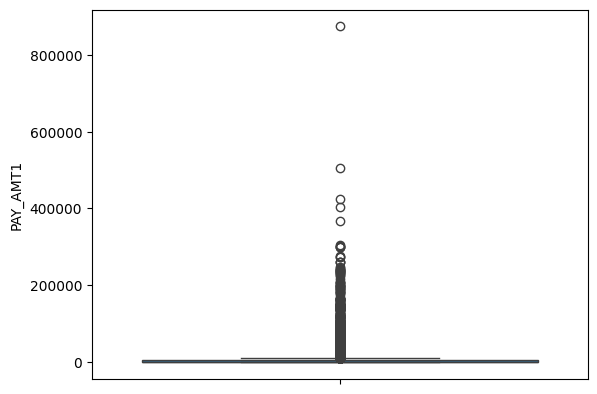

In [323]:
sns.boxplot(df['PAY_AMT1'])

In [324]:
df['PAY_AMT1'].quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# There is drastically change in both Negative value and also in 1% value. That Means there is some outliers present inside it.

0.0         0.0
0.1         0.0
0.2       325.0
0.3      1270.0
0.4      1732.0
0.5      2111.5
0.6      3000.0
0.7      4375.0
0.8      6300.0
0.9     10700.0
1.0    873552.0
Name: PAY_AMT1, dtype: float64

In [325]:
df['PAY_AMT1'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     11908.99
0.92     13200.00
0.93     15000.00
0.94     17000.00
0.95     20000.00
0.96     25001.12
0.97     33658.36
0.98     54492.36
0.99    130032.80
1.00    873552.00
Name: PAY_AMT1, dtype: float64

In [326]:
df['PAY_AMT1'][df['PAY_AMT1']>66522.18]=df['PAY_AMT1'].median()

<ipython-input-326-db3a7ced5e65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_AMT1'][df['PAY_AMT1']>66522.18]=df['PAY_AMT1'].median()


**PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6**

In [327]:
# This Features having same problems like PAY_AMT1.
df[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.0,0.0,0.0,0.0,0.0,0.0
0.1,0.0,0.0,0.0,0.0,0.0
0.2,282.0,3.0,0.0,0.0,0.0
0.3,1170.0,780.0,500.0,500.0,430.0
0.4,1600.0,1215.0,1000.0,1000.0,1000.0
0.5,2013.0,1811.5,1500.0,1500.0,1500.0
0.6,3000.0,2500.0,2126.4,2150.0,2100.0
0.7,4100.0,3600.0,3224.6,3253.9,3212.0
0.8,6010.0,5399.0,5000.0,5000.0,5000.0
0.9,10841.0,10000.0,10000.0,10000.0,10000.0


In [328]:
df[['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.91,12000.00,10840.45,10006.00,10000.00,10000.00
0.92,13183.32,12023.00,11000.00,11000.00,11099.08
0.93,15000.00,14000.00,12766.98,12604.54,13000.00
0.94,17414.18,15895.12,15000.00,15000.00,15522.60
0.95,20015.05,20000.00,18917.90,18165.50,20000.00
0.96,25390.76,23863.76,23302.32,22000.00,25349.00
0.97,34733.99,32580.86,31466.26,30485.97,37092.30
0.98,57327.98,52209.24,50825.88,50279.20,62121.18
0.99,140000.00,131000.62,124266.15,124586.18,140000.00
1.00,1684259.00,889043.00,621000.00,426529.00,528666.00


In [329]:
# Median Value Imputation
df['PAY_AMT2'][df['PAY_AMT2']>76651.02]=df['PAY_AMT2'].median()
df['PAY_AMT3'][df['PAY_AMT3']>70000.00]=df['PAY_AMT3'].median()
df['PAY_AMT4'][df['PAY_AMT4']>67054.44]=df['PAY_AMT4'].median()
df['PAY_AMT5'][df['PAY_AMT5']>65607.56]=df['PAY_AMT5'].median()
df['PAY_AMT6'][df['PAY_AMT6']>82619.05]=df['PAY_AMT6'].median()

<ipython-input-329-93b15a0274cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_AMT2'][df['PAY_AMT2']>76651.02]=df['PAY_AMT2'].median()
<ipython-input-329-93b15a0274cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_AMT3'][df['PAY_AMT3']>70000.00]=df['PAY_AMT3'].median()
<ipython-input-329-93b15a0274cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAY_AMT4'][df['PAY_AMT4']>67054.44]=df['PAY_AMT4'].median()
<